### Mini Project
## Notebook made by  

|** Name** | **Student id** | **email**|
|:- |:-|:-|
|Niek de Visscher | 10667474 | niekdevisscher@hetnet.nl |
| Leon Smits | 10500731 | leonmarijnsmits@gmail.com|
| Daniël van lier | 10639861 | danielvanlier@gmail.com |

### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )



Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file. 

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='http://i.imgur.com/hConduu.jpg'/>
<img src='http://i.imgur.com/r4tIPrA.jpg?1'/>
<img src='http://i.imgur.com/KbRwRFz.jpg'/>

### Note
* **Assignments without the selfies or completely filled in information will not be graded and receive 0 points.**

#### Onderwerp:
200 jaar troonredes



In [291]:
%matplotlib inline
import pandas as pd
import re
from lxml import etree 
from bz2file import BZ2File
import bz2
import codecs
import xml
import glob
from collections import defaultdict, Counter
from bs4 import BeautifulSoup
from pattern.nl import parsetree, pprint
from xml import parsers
import xml.parsers.expat
from xml.etree import cElementTree as ET
from xml.dom.minidom import parse
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk import FreqDist


In [101]:
# the tekst is in <div id="post-content">

f= open('troonredes/troonredes/1818.html').read()
soup= BeautifulSoup(f)

ourdiv=soup.find('div', id="post-content") 
 
ourpars= [parsetree(p.text, lemmata=True, Relations=True) for p in ourdiv.findAll('p')]


In [102]:
sum(len(p) for p in ourpars)

46

In [103]:
def parse_troonrede(f):
    '''Read a troonrede file, extract all text and output a list of lists, 
    each element is a paragraph containing a list of sentences,
    each sentence is parsed.'''
    soup= BeautifulSoup(open(f).read())
    ourdiv=soup.find('div', id="post-content") 
    ourpars= [parsetree(p.text, lemmata=True, Relations=True) for p in ourdiv.findAll('p')[:-1]]
    return ourpars

parse_troonrede('test/2007.html')

# this applies step 2 to all troonredes 
def parse_corpus(folder):
    alltroonredes= glob.glob(folder)
    troonredes={}
    for troonrede in alltroonredes:
        key= troonrede.split('\\')[1].replace('.html','')
        value= parse_troonrede(troonrede)
        troonredes[key]=value
    return troonredes


%time parsedtroonredes= parse_corpus('files/*.html')

Wall time: 46.3 s


In [90]:
def reduce_to_nouns(parsedcorpus):
    nouns_coocuuring_per_paragraph= [list(set([ w.lemma for s in p for w in s.nouns]))  for p in parsedcorpus  ]
    return nouns_coocuuring_per_paragraph

%time Nounstroonredes= {k:reduce_to_nouns(parsedtroonredes[k]) for k in parsedtroonredes}

Wall time: 170 ms


In [341]:
#alle paragrafen per troonrede
x = ''
for k in parsedtroonredes:
    x = k
    
for x in reduce_to_nouns(parsedtroonredes[x]):
    test = 1

In [148]:
def NrWords(L):
    terms=[]
    for p in L:
        terms+=p
    return(len(terms),len(set(terms)))

Nrwords= {y:NrWords(Nounstroonredes[y]) for y in Nounstroonredes}
#print Nrwords

def Vocabulary(Dict):
    terms=[]
    for y in Dict:
        for p in Dict[y]:
            terms+=p
    return Counter(terms)

TroonredeNounsVocab=Vocabulary(Nounstroonredes)
#print TroonredeNounsVocab

In [92]:
(len(TroonredeNounsVocab), 
 len([t for t in TroonredeNounsVocab if TroonredeNounsVocab[t] >1]),
 sum(TroonredeNounsVocab.values()), 
 TroonredeNounsVocab.most_common(20)
 )

(6728,
 3262,
 39090,
 [(u'regering', 614),
  (u'jaar', 482),
  (u'den', 455),
  (u'land', 331),
  (u'maatregel', 230),
  (u'ontwikkeling', 227),
  (u'nederland', 222),
  (u'belang', 213),
  (u'aandacht', 198),
  (u'wet', 172),
  (u'zorg', 165),
  (u'verbetering', 164),
  (u'staten-generaal', 163),
  (u'toestand', 159),
  (u'beleid', 159),
  (u'edel', 151),
  (u'samenwerking', 148),
  (u'onderwijs', 139),
  (u'deel', 138),
  (u'middeel', 137)])

In [211]:
def pars2cooccurance(L):
    '''L is a list of lists of terms. We output a Counter object with alphabetically 
    ordered pairs of terms as keys and the number of times they co
    occur as values.'''
    pairs = [ t1+'-'+t2 for list in L for t1 in list for t2 in list if t1 < t2]
    return Counter(pairs)


% time coOccuringNouns= {y:pars2cooccurance(Nounstroonredes[y]) for y in Nounstroonredes}

#Co-occurence and word appearance per 10 years
jaren = 1818
count = 0
cooccurper10 = []
these10 = []
wordsper10 = []
words = []
years = []
while jaren < 2015:
    try:
        these10 += coOccuringNouns[str(jaren)] 
        for p in Nounstroonredes[str(jaren)]:
            words += p
        years.append(jaren)
        jaren += 1
        count += 1
        
    except:
        jaren += 1
        continue
    if count == 10:
        cooccurper10.append(these10)
        wordsper10.append(words)
        count = 0
        these10 = []
        words = []
years.append(jaren)        

#Total co-occurence and word appearance over all files
begin = 1818
total = []
totalwords = {}
while begin < 2015:
    try:
        total += coOccuringNouns[str(begin)]
        for p in Nounstroonredes[str(begin)]:
            for x in p:
                if x in totalwords:
                    totalwords[x] += 1
                else:
                    totalwords[x] = 1
        begin += 1
    except:
        begin += 1
        continue
    
#How often 2 term have co-occured over all time
totalCounted = Counter(total)

#for the first 10 years the 15 most used words
for x in range(0,len(wordsper10)):
    print "Dit is van periode:",years[int(str(x)+'0')],'-',years[int(str(x)+'0')+10]
    print ""
    for data in Counter(wordsper10[x]).most_common(15):
        first = totalwords[data[0]]
        second = data[1]
        diff = (float(second)/first)*100
        print data[0],':', diff
    start += 10
    print ""
    


Wall time: 837 ms
Dit is van periode: 1818 - 1829

den : 19.0697674419
jaar : 10.284463895
ed.mog : 100.0
zoo : 31.2
vergadering : 46.6666666667
edel : 21.8543046358
wet : 16.6666666667
belang : 12.3076923077
handel : 19.4690265487
middeel : 14.8148148148
een : 58.8235294118
instelling : 29.2307692308
zitting : 18.2692307692
algemeen : 22.5
gevolg : 17.7083333333

Dit is van periode: 1829 - 1840

den : 16.0465116279
edel : 39.7350993377
mogenden : 43.5185185185
zoo : 24.0
jaar : 6.12691466083
vergadering : 36.0
zitting : 25.0
wet : 11.7283950617
middeel : 13.3333333333
maatregel : 7.83410138249
bezitting : 28.3333333333
zorg : 10.0628930818
handel : 14.1592920354
mogende : 36.5853658537
betrekking : 12.2950819672

Dit is van periode: 1840 - 1870

den : 14.4186046512
edel : 38.4105960265
mogenden : 40.7407407407
zitting : 27.8846153846
wet : 14.1975308642
zoo : 16.8
heeren : 22.5
grondwet : 29.5081967213
mogende : 36.5853658537
middeel : 10.3703703704
rijks : 26.4150943396
toestand : 8.

In [270]:
#From the 5 most appearing words in 10 years their 5 most common co-occurences (Over the last 10 years)
count = 0
testing = {}
for data in Counter(wordsper10[-1]).most_common(5):
    print ""
    print data[0]
    test = []
    for x in Counter(cooccurper10[-1]).most_common():
        if count != 5:
            if bool(re.match('\\b'+data[0]+'\\b',x[0])):
                test.append(x)
                print x
                count += 1
        else:
            count = 0
            testing[data[0]] = test
            break


regering
(u'regering-ruimte', 10)
(u'regering-vorm', 9)
(u'regering-veiligheid', 9)
(u'regering-samenwerking', 9)
(u'regering-unie', 9)

jaar
(u'jaar-regering', 10)
(u'jaar-mens', 9)
(u'jaar-land', 9)
(u'jaar-veiligheid', 9)
(u'jaar-zorg', 9)

land
(u'land-nederland', 10)
(u'land-regering', 9)
(u'land-ontwikkeling', 8)
(u'land-maatregel', 7)
(u'land-welvaart', 7)

nederland
(u'nederland-wereld', 8)
(u'nederland-ontwikkeling', 8)
(u'nederland-regering', 8)
(u'nederland-unie', 7)
(u'nederland-samenwerking', 7)

samenleving
(u'samenleving-veiligheid', 6)
(u'samenleving-zorg', 5)
(u'samenleving-werk', 5)
(u'samenleving-verantwoordelijkheid', 5)
(u'samenleving-toekomst', 5)


In [266]:
#For the total co-occurence a dataframe
coOccurenceDict = {}
for x in totalCounted.most_common():
    coOccurenceDict[x[0]] = x[1]
    
dataframe = pd.DataFrame(coOccurenceDict.items(), columns=['combination', 'occurence'])
dataframe.sort_values('occurence',ascending=False).head(20)

,combination,occurence
32479,leed-staten-generaal,61
162606,betrekking-mogendheid,50
56518,den-toestand,48
261844,jaar-maatregel,44
229452,den-jaar,43
163291,jaar-regering,42
164548,den-handel,39
143138,betrekking-den,39
108356,jaar-land,39
230159,land-regering,39


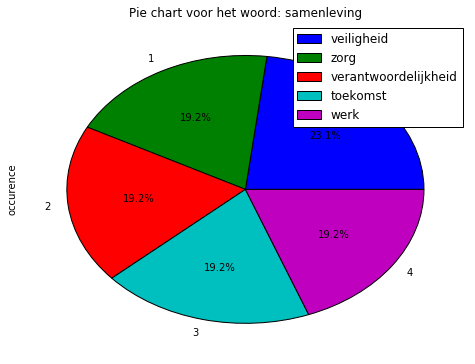

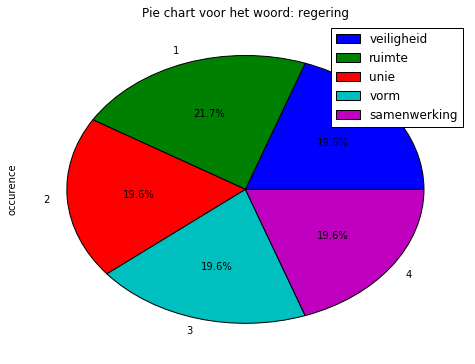

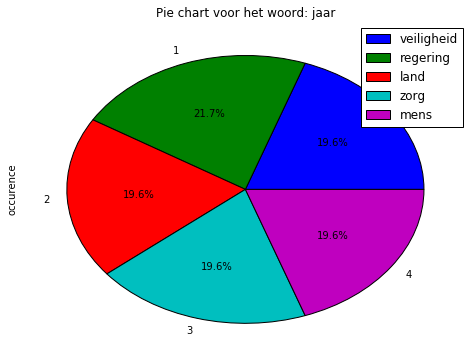

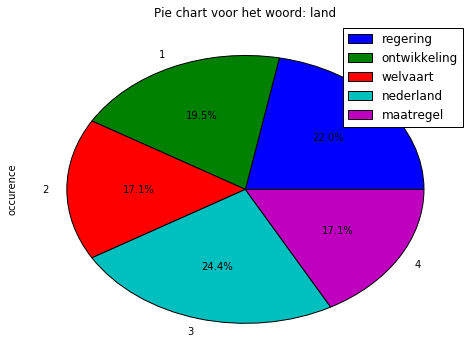

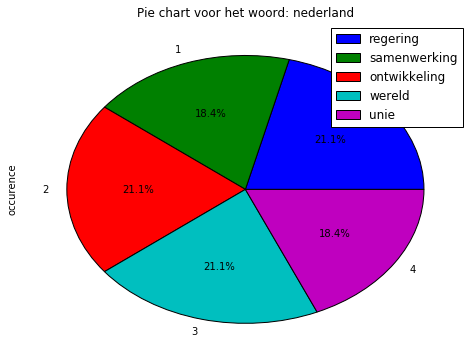

In [336]:
#Pie charts with the percentage the most common co-occuring words occur with a given word
for x in testing:
    testdict = {}
    for y in testing[x]:
        word = y[0].split('-')[1]
        testdict[word] = y[1]
    df = pd.DataFrame(testdict.items(), columns=['word', 'occurence'])
    title="Pie chart voor het woord: "+x
    plt = df.plot(kind='pie',y="occurence",x="word",figsize={6,8},title=title,autopct='%1.1f%%')
    labels = df["word"]
    plt.legend(labels)

## Woordwebben van veel voorkomende woorden per 10 jaar troonredes:
### 1818-1828:
<img src="images/1818-1828.png">
### 1828-1840:
<img src="images/1828-1840.png">
### 1840-1870:
<img src="images/1840-1870.png">
### 1870-1880:
<img src="images/1870-1880.png">
### 1880-1894:
<img src="images/1880-1894.png">
### 1894-1926:
<img src="images/1894-1926.png">
### 1926-1936:
<img src="images/1926-1936.png">
### 1936-1959:
<img src="images/1936-1959.png">
### 1959-1978:
<img src="images/1959-1978.png">
### 1978-1988:
<img src="images/1978-1988.png">
### 1988-2008:
<img src="images/1988-2008.png">

In [344]:
!ipython nbconvert week2-slides.ipynb  --to slides --reveal-prefix "http://maartenmarx.nl/reveal.js"

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options

-------



Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.


-y

    Answer yes to any questions instead of prompting.

--execute

    Execute the notebook prior to export.

--allow-errors

    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.

--stdout

    Write notebook output to stdout instead of files.

--debug

    set log level to logging.DEBUG (maximize logging output)

--inplace

    Run nbconvert in place, overwriting the existing notebook (only 
    relevant when converting to notebook format)

--generate-config

    generate default config file
--reveal-prefix=<Unic

[NbConvertApp] WARNING | pattern u'week2-slides.ipynb' matched no files
